# Introduzione

L'obiettivo è quello di analizzare il dataset sui funghi, e testare diversi classificatori per trovare il migliore nel classificare nuovi funghi come commestibili o velenosi. Il documento è composto come segue:

- Data Exploration
    - Analisi classi dataset
    - Feature Selection
    - Rimozione righe malformate
- Test Classificatori
    - Naive Bayes
    - Random Forest
    - ...
    - ...

Import delle librerie necessarie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
#altri import futuri

Caricamento del dataset

In [2]:
df = pd.read_csv("dataset/secondary_data.csv", sep=";")
print("Dimension:", df.shape)
df.head()

Dimension: (61069, 21)


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


# Data Exploration

Visualizzazione campi non nulli per ogni colonna/feature del dataset. Questo ci serve per vedere eventuali colonne che possono poi essere rimosse

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

## Class Balancing
Siamo interessati a classificare i funghi come velenosi o meno, per questo motivo identifichiamo le due classi di interesse a partire dalla colonna "class" del dataset. Vogliamo vedere quanto sono bilanciate le classi del dataset

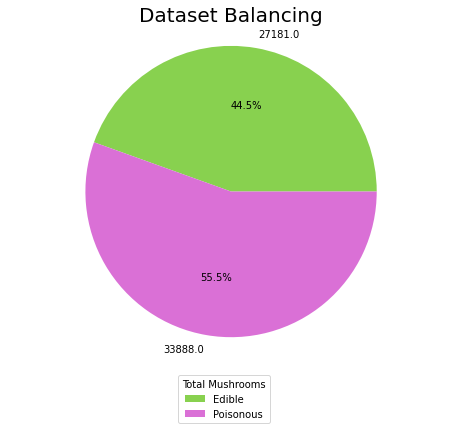

In [4]:
classes = [{"Commestibili": (df["class"] == "e").sum(), "Velenosi": (df["class"] == "p").sum()}]
total  = pd.DataFrame(classes)
total_e = float(total["Commestibili"])
total_p = float(total["Velenosi"])
mushrooms = [total_e, total_p]
mushrooms_labels = 'Edible','Poisonous'
fig, ax = plt.subplots(figsize = (8,6))
plt.pie(mushrooms,labels=mushrooms,autopct='%1.1f%%',colors = ['#88d14f', '#DA70D6'])
plt.title('Dataset Balancing', loc = "center", fontsize="20")
plt.axis('equal')
plt.legend(mushrooms_labels,title="Total Mushrooms",bbox_to_anchor=(0.6, -0.05, 0, 0))
fig.set_facecolor('white')
plt.show()

Vediamo che ci sono in percetuale il 10% in più di funghi velenosi, e questo può portare il classificatore a tendere nel classificare funghi come velenosi (falso positivo). Questo errore è meno grave del falso negativo (perche se ti dico che un fungo è velenoso comunque non lo mangi, il contrario invece è velenoso ti dico di no e muori). 

Possiamo pensare di ribilanciare le classi tramite oversampling o undersampling, oppure ancora meglio con SMOTE.

Rivalutare magari il class balancing dopo rimozione delle righe con valori nulli.

## Feature Visualization

Visualizziamo il numero di classi per ogni feature in modo da visualizzare possibili colonne da rimuovere perche con valori costanti o quasi.

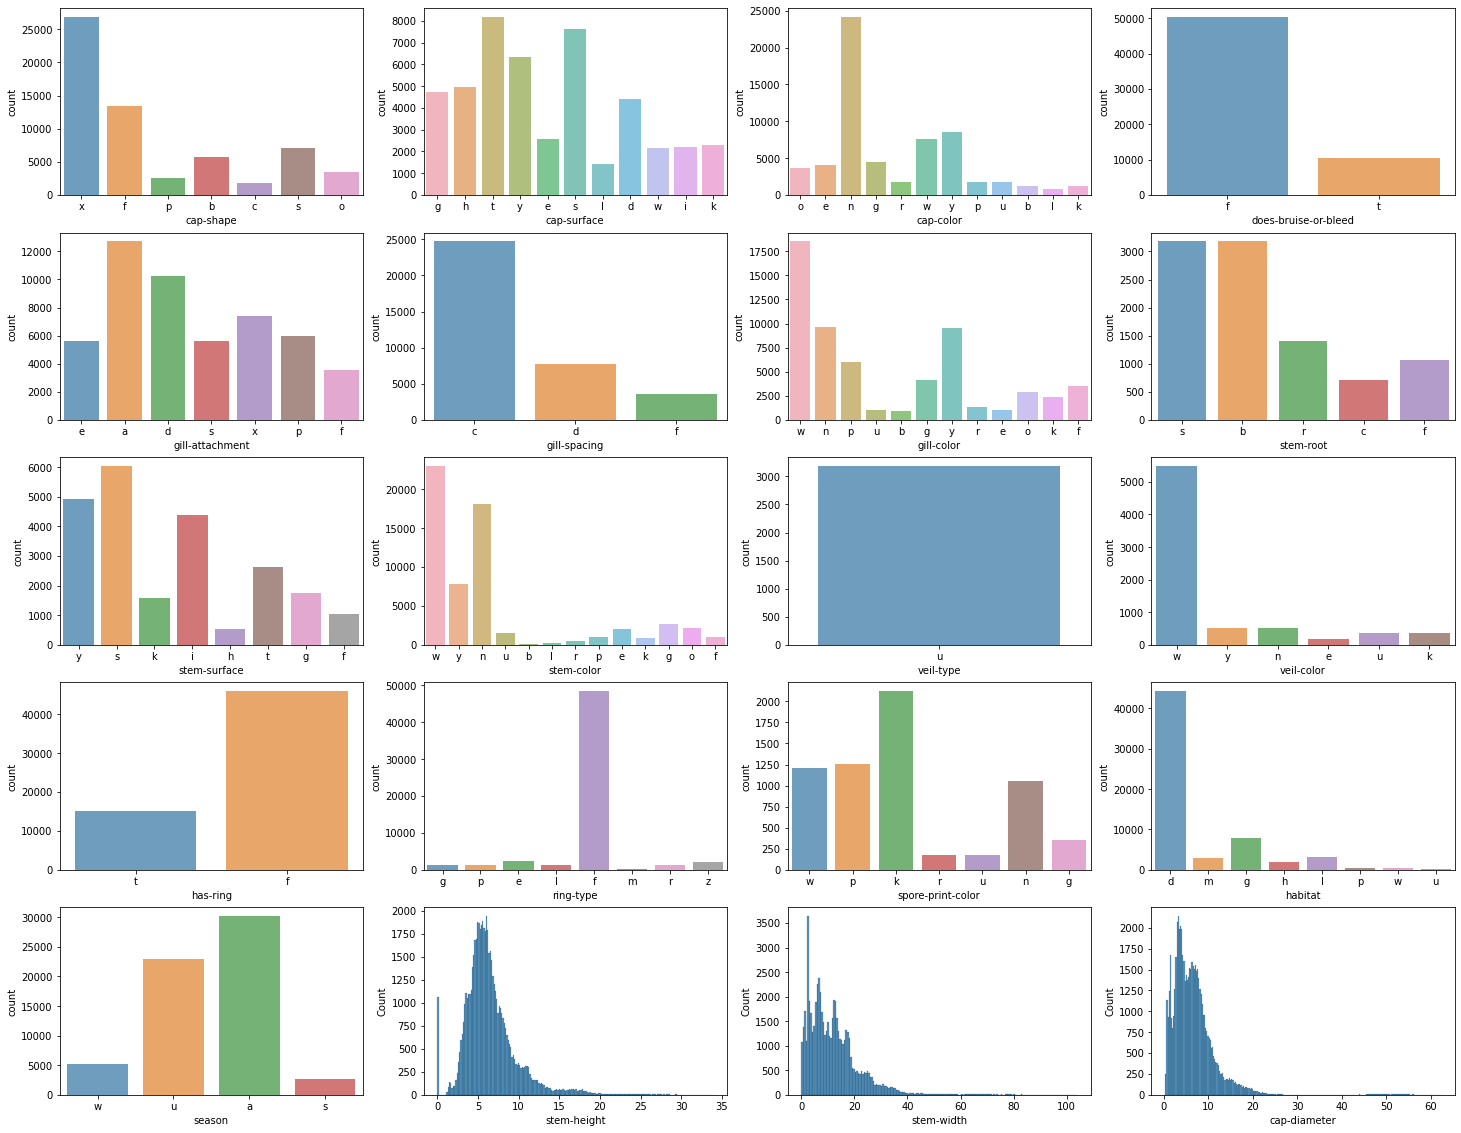

In [5]:
categ =  [ 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']
conti = ['stem-height', 'stem-width', 'cap-diameter']
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']

fig = plt.figure(figsize=(25,20))
for i in range(0, len(categ)):
    fig.add_subplot(5,4,i+1)
    sns.countplot(x=categ[i], data=df, alpha=.7) 

for col in conti:
    fig.add_subplot(5,4,i+2)
    i+=1
    sns.histplot(df[col].dropna(), kde_kws={"lw": 2, "color":colors[8]})

Analizzando la distribuzione delle varie features è evidente che la feature ```veil-type``` possa essere rimossa dall'insieme delle features. Questo perché presenta soltanto 3177 valori non nulli, e di valore costante ```u```.

In [6]:
df = df.drop("veil-type", 1)

C:\Users\danil\AppData\Local\Temp\ipykernel_17912\893408206.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("veil-type", 1)


## Conversione Features e Mapping

Conversione delle features categoriche in nominali, si modifica prima il tipo di dato dei valori delle features da 'object' in 'category' per poi procedere con l'effettiva trasformazione dei valori categorici.

Si trasformano i valori categorici in numerici (int64) e si salva il dizionario che mantiene il mapping per un eventuale utilizzo futuro.

In [7]:
mapping = []
mapped_dataset = df
mapped_dataset.info()
encoder = LabelEncoder()

for i in range(len(mapped_dataset.columns)):
    if (mapped_dataset[mapped_dataset.columns[i]].dtype != "float64"):
        mapped_dataset[mapped_dataset.columns[i]] = encoder.fit_transform(mapped_dataset[mapped_dataset.columns[i]])
        mapping_dict = {index : label for index , label in enumerate(encoder.classes_)}
        mapping.append(mapping_dict)

mapped_dataset = mapped_dataset.where(~df.isna(), df)

for col in mapped_dataset:
    if (mapped_dataset[col].dtype == 'object'):
        mapped_dataset[col] = mapped_dataset[col].astype('Int64')
        print(mapped_dataset[col].dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-color            7413 non-null   object 
 15  has-ring           

## Feature Correlation

Vediamo il grado di correlazione reciproco tra le varie feature, compresa la correlazione di ogni feature con il target. In generale vogliamo che una feature sia altamente correlata con il target (quindi che il suo valore sia importante per discriminare se il fungo è positivo o negativo). Una correlazione alta è sia positiva (aumento del valore di uno aumenta il valore dell'altro) che negativa (aumento del valore di uno diminuisce il valore dell'altro). Una correlazione vicina allo zero implica che le variabili sono indipendenti tra loro.

In [8]:
mapped_dataset.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1,15.26,6,2,6,0,2,3,10,16.95,17.09,4,7,11,4,1,2,7,0,3
1,1,16.60,6,2,6,0,2,3,10,17.99,18.19,4,7,11,4,1,2,7,0,2
2,1,14.07,6,2,6,0,2,3,10,17.80,17.74,4,7,11,4,1,2,7,0,3
3,1,14.17,2,3,1,0,2,3,10,15.77,15.98,4,7,11,4,1,5,7,0,3
4,1,14.64,6,3,6,0,2,3,10,16.53,17.20,4,7,11,4,1,5,7,0,3


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 [Text(0, 0.5, 'class'),
  Text(0, 1.5, 'cap-diameter'),
  Text(0, 2.5, 'cap-shape'),
  Text(0, 3.5, 'cap-surface'),
  Text(0, 4.5, 'cap-color'),
  Text(0, 5.5, 'does-bruise-or-bleed'),
  Text(0, 6.5, 'gill-attachment'),
  Text(0, 7.5, 'gill-spacing'),
  Text(0, 8.5, 'gill-color'),
  Text(0, 9.5, 'stem-height'),
  Text(0, 10.5, 'stem-width'),
  Text(0, 11.5, 'stem-root'),
  Text(0, 12.5, 'stem-surface'),
  Text(0, 13.5, 'stem-color'),
  Text(0, 14.5, 'veil-color'),
  Text(0, 15.5, 'has-ring'),
  Text(0, 16.5, 'ring-type'),
  Text(0, 17.5, 'spore-print-color'),
  Text(0, 18.5, 'habitat'),
  Text(0, 19.5, 'season')])

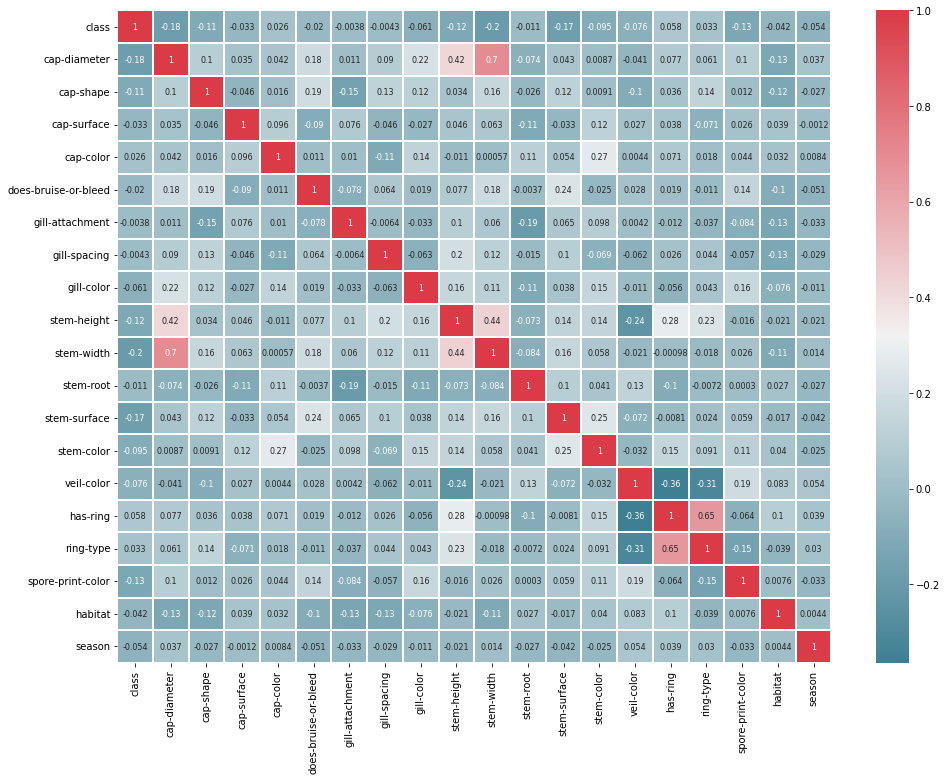

In [9]:
plt.figure(figsize=(16,12))
sns.heatmap(mapped_dataset.corr(), linewidths=.1, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0)

## Feature Selection

Si selezionano le feature più utili ai fini della classificazione

### Rimozione di features con dati costanti

Primo approccio base di feature selection andiamo a rimuovere le feature con varianza nulla presenti nel df, ovvero quelle features il cui valore è costante.   
Dalla fase di Data Visualization abbiamo notato che una features con varianza nulla è il veil-type.
 
TODO Valutare l'utilizzo di una VarianceThreshold from SkLearn per rimuovere le features con varianza bassa

### Rimozione di features con valori nulli

Si cancellano le features che presentano più del 50% di valori nulli. Per le colonne con meno del 50% di valori nulli si utilizza invece un meccanismo di imputazione per sopperire alla presenza di dati mancanti in quelle features da scartare ma che hanno buona correlazione (vd. dopo) con la variabile target e buona distribuzione dei valori.

In [10]:
# TODO cap-surface,14120 | gill-attachment,9884 | gill-spacing,25063 | stem-surface,38124 | ring-type,2471
df = df.drop("veil-color", 1)
df = df.drop("spore-print-color", 1)
df = df.drop("stem-root", 1)
df.head()

C:\Users\danil\AppData\Local\Temp\ipykernel_17912\1379450327.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("veil-color", 1)
C:\Users\danil\AppData\Local\Temp\ipykernel_17912\1379450327.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("spore-print-color", 1)
C:\Users\danil\AppData\Local\Temp\ipykernel_17912\1379450327.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop("stem-root", 1)


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,1,15.26,6,2,6,0,2,3,10,16.95,17.09,7,11,1,2,0,3
1,1,16.60,6,2,6,0,2,3,10,17.99,18.19,7,11,1,2,0,2
2,1,14.07,6,2,6,0,2,3,10,17.80,17.74,7,11,1,2,0,3
3,1,14.17,2,3,1,0,2,3,10,15.77,15.98,7,11,1,5,0,3
4,1,14.64,6,3,6,0,2,3,10,16.53,17.20,7,11,1,5,0,3


## Imputazione delle features con valori nulli

Si utilizza un meccanismo di imputazione per sopperire alla presenza di dati mancanti per le features da scartare per la politica scelta (nan < 50%), ma che presentano una buona correlazione con la variabile target e una buona distribuzione dei valori.
Ovviamente il meccanismo è applicato anche a quelle features con meno del 20% di valori nulli, così da ripristinare la variabile per l'uso nella classificazione rimpiazzando tutti i dati mancanti.

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer

#imp = SimpleImputer(strategy="most_frequent")
imp = KNNImputer(n_neighbors=1, weights='uniform')

imputedDataset = pd.DataFrame(imp.fit_transform(mapped_dataset))
print(imputedDataset[7].value_counts())

3.0    25063
0.0    24710
1.0     7766
2.0     3530
Name: 7, dtype: int64
